In [1]:
import numpy as np

In [129]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.chosen_components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        #center the data around the mean 
        X = X - self.mean
        #find the covariance matrix 
        #since each feature/ variable is represnted by  the col the covariance 
        #is calculated column-wise hence rowvar = False 
        cov = np.cov(X.T)
        
        #calculate the eigenvectors and value for the covariance, the vectors 
        #represnt the pricipal components
        eig_values, eig_vectors = np.linalg.eig(cov)

        #the eigen vector is a column vector, should be transposed for easuer 
        #calculation 
        eig_vectors = eig_vectors.T
        #the sort the eigenvectors according to the eigenvalues in descending order
        idx = np.argsort(eig_values)[::-1]
        eig_values = eig_values[idx]
        eig_vectors = eig_vectors[idx]

        #now picking the first kth dimensions 
        self.chosen_components = eig_vectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        #tranform the original n dimensional data to k dimension using the dot 
        #product between the data and the eigenvecotrs.
        return np.dot(X, self.chosen_components.T)  

In [130]:
#toy dataset,,was used during PCA class creation
X = np.random.randint(10,20,size=4).reshape(2,2)

In [131]:
import pandas as pd 
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv("./DATA/iris.csv")

In [133]:
columns = ["sepal.length", "sepal.width", "petal.length", "petal.width"]

In [134]:
X = df[columns]
y = df["variety"]

In [135]:
new_y = []
for variety in y:
    if variety == "Setosa":
        new_y.append(0)

    if variety == "Virginica":
        new_y.append(1)

    if variety == "Versicolor":
        new_y.append(2)

In [136]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)


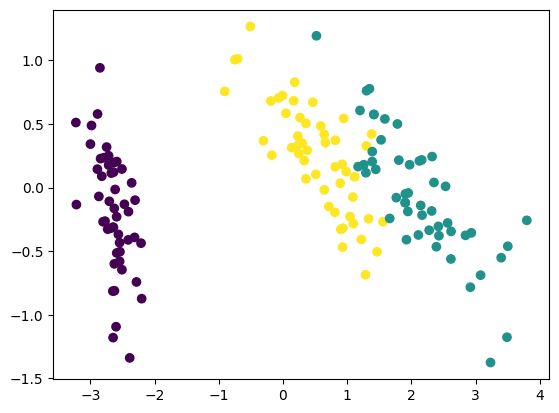

In [137]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1,x2, c=new_y)